In [169]:
import os
import random
import re
from collections import defaultdict
import numpy as np
import shutil

In [1]:
path_pyro = r"C:\Users\nicoi\Downloads\pyronear_ds_03_2024\pyronear_ds_03_2024" 
path_figlib = r"C:\Users\nicoi\Downloads\FIGLIB_ANNOTATED_RESIZED\FIGLIB_ANNOTATED_RESIZED"

In [3]:
path_labels_train = os.path.join(path_pyro, "labels", "train")
path_labels_val = os.path.join(path_pyro, "labels", "val")
cantidad =  os.listdir(path_labels_train) + os.listdir(path_labels_val)
print(f"cantidad de archivos: {len(cantidad)}")

# contar cantidad de archivos en el directorio
path_images_train = os.path.join(path_pyro, "images", "train")
path_images_val = os.path.join(path_pyro, "images", "val")
cantidad = os.listdir(path_images_train) + os.listdir(path_images_val)
print(f"cantidad de imagenes: {len(cantidad)}")                                                                                                                                                         


cantidad de archivos: 15998
cantidad de imagenes: 17528


In [4]:
# agrupar por nombres
# Términos de búsqueda
terminos = ["AWF", "hpwren", "pyronear", "random", "synthetic", "ADF"]


agrupaciones = {termino: [] for termino in terminos}
agrupaciones["otros"] = []  # Para los elementos que no coincidan con ningún término

# Agrupar elementos según los términos (sin importar mayúsculas/minúsculas)
for elemento in cantidad:
    encontrado = False
    for termino in terminos:
        if termino.lower() in elemento.lower():
            agrupaciones[termino].append(elemento)
            encontrado = True
            break
    if not encontrado:
        agrupaciones["otros"].append(elemento)

# Imprimir el resultado
for key, value in agrupaciones.items():
    print(f"{key}: {value}")

AWF: ['AWF_axis-aeneas_2023_06_04T16_45_50.jpg', 'AWF_axis-alderhill_2023_06_02T20_56_38.jpg', 'AWF_axis-alderhill_2023_06_03T20_54_43.jpg', 'AWF_axis-alderhill_2023_06_04T08_29_32.jpg', 'AWF_axis-alta_2023_06_01T19_56_28.jpg', 'AWF_axis-alta_2023_06_02T10_58_48.jpg', 'AWF_axis-anderson_2023_06_01T07_19_36.jpg', 'AWF_axis-anderson_2023_06_01T16_08_25.jpg', 'AWF_axis-anderson_2023_06_01T18_16_25.jpg', 'AWF_axis-anderson_2023_06_02T08_01_19.jpg', 'AWF_axis-angel_2023_06_03T14_17_04.jpg', 'AWF_axis-angel_2023_06_03T17_45_55.jpg', 'AWF_axis-armstronglookout1_2023_06_01T10_35_04.jpg', 'AWF_axis-armstronglookout1_2023_06_01T10_36_04.jpg', 'AWF_axis-armstronglookout1_2023_06_01T10_38_04.jpg', 'AWF_axis-armstronglookout1_2023_06_01T11_01_04.jpg', 'AWF_axis-armstronglookout1_2023_06_01T11_02_04.jpg', 'AWF_axis-armstronglookout1_2023_06_01T11_03_04.jpg', 'AWF_axis-armstronglookout1_2023_06_01T13_22_04.jpg', 'AWF_axis-babbitt_2023_06_04T16_08_42.jpg', 'AWF_axis-baldmtndeervalley_2023_06_02T17_31_

In [5]:
# PRINT CANTIDAD DE ARCHIVOS POR GRUPO Y TOTAL
TOTAL = 0
for key, value in agrupaciones.items():
    print(f"{key}: {len(value)}")
    TOTAL += len(value)
print(f"TOTAL: {TOTAL}")

AWF: 3927
hpwren: 5853
pyronear: 6579
random: 221
synthetic: 806
ADF: 142
otros: 0
TOTAL: 17528


In [18]:
def make_videos(AWF):
    # Agrupar archivos por nombre de incendio
    pattern = r'^(.*)_[0-9]{4}'
    agrupaciones_awf = defaultdict(list)

    for archivo in AWF:
        match = re.match(pattern, archivo)
        if match:
            nombre_incendio = match.group(1)
            agrupaciones_awf[nombre_incendio].append(archivo)
    return agrupaciones_awf

In [34]:
adf = agrupaciones["ADF"]
agrupaciones_adf = make_videos(adf)
print(f"ADF: {len(agrupaciones_adf)}")
awf = agrupaciones["AWF"]
agrupaciones_awf = make_videos(awf)
print(f"AWF: {len(agrupaciones_awf)}")
hpwren = agrupaciones["hpwren"]
agrupaciones_hpwren = make_videos(hpwren)
print(f"hpwren: {len(agrupaciones_hpwren)}")
pyronear = agrupaciones["pyronear"]
agrupaciones_pyronear = make_videos(pyronear)
print(f"pyronear: {len(agrupaciones_pyronear)}")
# random = agrupaciones["random"]
# agrupaciones_random = make_videos(random)
# print(f"random: {len(agrupaciones_random)}")
# synthetic = agrupaciones["synthetic"]
# agrupaciones_synthetic = make_videos(synthetic)
# print(f"synthetic: {len(agrupaciones_synthetic)}")
total_videos = len(agrupaciones_adf) + len(agrupaciones_awf) + len(agrupaciones_pyronear)
print(f"TOTAL: {total_videos}")

ADF: 2
AWF: 176
hpwren: 74
pyronear: 48
TOTAL: 226


In [59]:
# suma total de videos
total_videos = len(agrupaciones_adf) + len(agrupaciones_awf) + len(agrupaciones_hpwren) + len(agrupaciones_pyronear)
print(f"TOTAL: {total_videos}")

TOTAL: 300


In [60]:
# funcion que reparta los videos en train, val y test

def split_train_val_test(videos, train=0.8, val=0.1, test=0.1):
    # Crear una lista con los nombres de los videos
    nombres_videos = list(videos.keys())
    # Mezclar los nombres de los videos
    random.shuffle(nombres_videos)
    # Calcular la cantidad de videos para cada conjunto
    cantidad_videos = len(nombres_videos)
    print(f"cantidad de videos: {cantidad_videos}")
    cantidad_train = int(cantidad_videos * train)
    cantidad_val = int(cantidad_videos * val)
    cantidad_test = cantidad_videos - cantidad_train - cantidad_val
    # Crear los conjuntos de videos
    videos_train = {nombre: videos[nombre] for nombre in nombres_videos[:cantidad_train]}
    videos_val = {nombre: videos[nombre] for nombre in nombres_videos[cantidad_train:cantidad_train + cantidad_val]}
    videos_test = {nombre: videos[nombre] for nombre in nombres_videos[cantidad_train + cantidad_val:]}
    print(f"train: {len(videos_train)}")
    print(f"val: {len(videos_val)}")
    print(f"test: {len(videos_test)}")
    return videos_train, videos_val, videos_test

In [155]:
import os
import shutil

def buscar_archivo(frame, directorios):
    """Función para buscar un archivo en múltiples directorios."""
    for directorio in directorios:
        ruta_archivo = os.path.join(directorio, frame)
        if os.path.exists(ruta_archivo):
            return ruta_archivo
    return None

def copy_files(videos, path_labels1, path_labels2, path_images1, path_images2, destino):
    for video, frames in videos.items():
        # Crear una subcarpeta con el nombre del video en la carpeta de destino
        video_destino = os.path.join(destino, video)
        os.makedirs(video_destino, exist_ok=True)
        
        for frame in frames:
            # Buscar imagen en los dos directorios de imágenes
            path_imagen_origen = buscar_archivo(frame, [path_images1, path_images2])
            if path_imagen_origen:  # Si la imagen se encuentra en alguno de los directorios
                path_imagen_destino = os.path.join(video_destino, frame)
                shutil.copy(path_imagen_origen, path_imagen_destino)
            else:
                print(f"No se encontró la imagen para {frame}")
                continue  # Saltar al siguiente frame si no se encuentra la imagen

            # Buscar etiqueta correspondiente en los dos directorios de etiquetas
            etiqueta_nombre = frame.replace(".jpg", ".txt")
            path_etiquetas_origen = buscar_archivo(etiqueta_nombre, [path_labels1, path_labels2])
            if path_etiquetas_origen:  # Si el archivo de etiquetas existe en alguno de los directorios
                path_etiquetas_destino = os.path.join(video_destino, etiqueta_nombre)
                shutil.copy(path_etiquetas_origen, path_etiquetas_destino)
            else:
                # print(f"No se encontró la etiqueta para {frame}")
                # se crea un archivo vacio
                path_etiquetas_destino = os.path.join(video_destino, etiqueta_nombre)
                with open(path_etiquetas_destino, "w") as f:
                    pass




# train directories
train_path = r"C:\Users\nicoi\OneDrive\Escritorio\wildfire2024Video\data\train"
os.makedirs(train_path, exist_ok=True)
val_path = r"C:\Users\nicoi\OneDrive\Escritorio\wildfire2024Video\data\val"
os.makedirs(val_path, exist_ok=True)
test_path = r"C:\Users\nicoi\OneDrive\Escritorio\wildfire2024Video\data\test"
os.makedirs(test_path, exist_ok=True)

In [160]:
# a,b,c =split_train_val_test(agrupaciones_awf)
# a,b,c =split_train_val_test(agrupaciones_adf)
# # a,b,c =split_train_val_test(agrupaciones_hpwren)
a,b,c =split_train_val_test(agrupaciones_pyronear)


cantidad de videos: 48
train: 38
val: 4
test: 6


In [161]:

copy_files(a, r"C:\Users\nicoi\Downloads\pyronear_ds_03_2024_1\pyronear_ds_03_2024\labels/train",
           r"C:\Users\nicoi\Downloads\pyronear_ds_03_2024_1\pyronear_ds_03_2024\labels/val",
              r"C:\Users\nicoi\Downloads\pyronear_ds_03_2024_1\pyronear_ds_03_2024/images/train",
                r"C:\Users\nicoi\Downloads\pyronear_ds_03_2024_1\pyronear_ds_03_2024/images/val",
                train_path)
copy_files(b, r"C:\Users\nicoi\Downloads\pyronear_ds_03_2024_1\pyronear_ds_03_2024\labels/train",
            r"C:\Users\nicoi\Downloads\pyronear_ds_03_2024_1\pyronear_ds_03_2024\labels/val",
                r"C:\Users\nicoi\Downloads\pyronear_ds_03_2024_1\pyronear_ds_03_2024/images/train",
                  r"C:\Users\nicoi\Downloads\pyronear_ds_03_2024_1\pyronear_ds_03_2024/images/val",
                  val_path)
copy_files(c, r"C:\Users\nicoi\Downloads\pyronear_ds_03_2024_1\pyronear_ds_03_2024\labels/train",
            r"C:\Users\nicoi\Downloads\pyronear_ds_03_2024_1\pyronear_ds_03_2024\labels/val",
                r"C:\Users\nicoi\Downloads\pyronear_ds_03_2024_1\pyronear_ds_03_2024/images/train",
                  r"C:\Users\nicoi\Downloads\pyronear_ds_03_2024_1\pyronear_ds_03_2024/images/val",
                  test_path)



In [147]:
test_elements = [
    "20190529_94Fire_lp-s-mobo-c",
    "20190610_FIRE_bh-w-mobo-c",
    "20190716_FIRE_bl-s-mobo-c",
    "20190924_FIRE_sm-n-mobo-c",
    "20200611_skyline_lp-n-mobo-c",
    "20200806_SpringsFire_lp-w-mobo-c",
    "20200822_BrattonFire_lp-e-mobo-c",
    "20200905_ValleyFire_lp-n-mobo-c",
    "20160722_FIRE_mw-e-mobo-c",
    "20170520_FIRE_lp-s-iqeye",
    "20170625_BBM_bm-n-mobo",
    "20170708_Whittier_syp-n-mobo-c",
    "20170722_FIRE_so-s-mobo-c",
    "20180504_FIRE_smer-tcs8-mobo-c",
    "20180504_FIRE_smer-tcs10-mobo-c",
    "20180809_FIRE_mg-w-mobo-c"
]
print(f"cantidad de elementos: {len(test_elements)}")

cantidad de elementos: 16


In [162]:
# escoger videos de train val test  de figlib

path_figlib = r"C:\Users\nicoi\Downloads\FIGLIB_ANNOTATED_RESIZED\FIGLIB_ANNOTATED_RESIZED"
data = os.listdir(path_figlib)
# dividir en train val test

# # Filtrar elementos que van al conjunto de prueba
test_data = [item for item in data if any(test_element in item for test_element in test_elements)]
print("Test data inicial:", len(test_data))

# Eliminar los elementos de prueba de los datos originales para que no se usen en entrenamiento/validación
remaining_data = [item for item in data if item not in test_data]

# Proporciones para entrenamiento, validación y prueba
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

# Calcular el tamaño total y los tamaños objetivo para train, val y test
total_size = len(data)
target_test_size = int(total_size * test_ratio)
target_val_size = int(total_size * val_ratio)
target_train_size = total_size - target_test_size - target_val_size  # El resto es para train

# Mezclar los datos restantes aleatoriamente
random.shuffle(remaining_data)

# Asegurarse de que el conjunto de prueba tenga la cantidad correcta de datos
while len(test_data) < target_test_size:
    if remaining_data:
        test_data.append(remaining_data.pop())
    else:
        break

# Asegurarse de que el conjunto de validación tenga la cantidad correcta de datos
val_data = []
while len(val_data) < target_val_size:
    if remaining_data:
        val_data.append(remaining_data.pop())
    else:
        break

# El resto de los datos se asigna al conjunto de entrenamiento
train_data = remaining_data[:target_train_size]

# Imprimir los tamaños finales de los conjuntos
print("Train data:", len(train_data))
print("Val data:", len(val_data))
print("Test data:", len(test_data))



Test data inicial: 16
Train data: 253
Val data: 31
Test data: 31


In [163]:
# copiar archivos de figlib a train val test
# los labels se encuentran en la misma carpeta que las imagenes en una carpeta llamada labels
# se copian los archivos de labels y las imagenes a las carpetas correspondientes
# train



# Definir los paths de las carpetas
path_figlib = r"C:\Users\nicoi\Downloads\FIGLIB_ANNOTATED_RESIZED\FIGLIB_ANNOTATED_RESIZED"
train_path = r"C:\Users\nicoi\OneDrive\Escritorio\wildfire2024Video\data\train"
val_path = r"C:\Users\nicoi\OneDrive\Escritorio\wildfire2024Video\data\val"
test_path = r"C:\Users\nicoi\OneDrive\Escritorio\wildfire2024Video\data\test"
label_folder = "labels"  # Subcarpeta donde se encuentran las etiquetas

# Crear carpetas si no existen
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Función para copiar imágenes y etiquetas manteniendo la estructura
# Función para copiar imágenes y etiquetas sin la subcarpeta de 'labels'
def copiar_carpetas_con_estructura(data, destino, path_figlib, label_folder):
    for item in data:
        # Ruta de la carpeta del incendio
        carpeta_src = os.path.join(path_figlib, item)
        carpeta_dest = os.path.join(destino, item)
        
        # Verificar si es una carpeta
        if os.path.isdir(carpeta_src):
            # Crear la carpeta de destino con el mismo nombre
            os.makedirs(carpeta_dest, exist_ok=True)
            
            # Copiar las imágenes (archivos dentro de la carpeta del incendio)
            for archivo in os.listdir(carpeta_src):
                archivo_src = os.path.join(carpeta_src, archivo)
                if os.path.isfile(archivo_src):  # Solo copiar archivos, no carpetas
                    archivo_dest = os.path.join(carpeta_dest, archivo)
                    shutil.copy(archivo_src, archivo_dest)
            
            # Copiar las etiquetas (dentro de la subcarpeta 'labels', pero dejarlas en la carpeta del incendio)
            labels_src = os.path.join(carpeta_src, label_folder)
            if os.path.exists(labels_src):
                for label in os.listdir(labels_src):
                    label_src = os.path.join(labels_src, label)
                    label_dest = os.path.join(carpeta_dest, label)  # Copiar directamente a la carpeta del incendio
                    shutil.copy(label_src, label_dest)
        else:
            print(f"{item} no es una carpeta.")

# Copiar carpetas de train, val y test con la estructura de subcarpetas y labels sueltos
copiar_carpetas_con_estructura(train_data, train_path, path_figlib, label_folder)
copiar_carpetas_con_estructura(val_data, val_path, path_figlib, label_folder)
copiar_carpetas_con_estructura(test_data, test_path, path_figlib, label_folder)

print("Copiado completado.")




Copiado completado.


In [164]:
# cuanta la cantiudad de archivos en cada carpeta jpg con glob recursivo
import glob

# train

train_images = glob.glob(train_path + "/**/*.jpg", recursive=True)
print(f"Train images: {len(train_images)}")
# val
val_images = glob.glob(val_path + "/**/*.jpg", recursive=True)
print(f"Val images: {len(val_images)}")
# test
test_images = glob.glob(test_path + "/**/*.jpg", recursive=True)
print(f"Test images: {len(test_images)}")

Train images: 28213
Val images: 3192
Test images: 4001


In [165]:
import glob
import os

# Función para contar archivos .txt vacíos y no vacíos, y directorios con todos los .txt vacíos o no
def contar_txt_vacios_y_no_vacios(path):
    txt_files = glob.glob(path + "/**/*.txt", recursive=True)
    vacios = 0
    no_vacios = 0
    carpetas_vacias = 0
    carpetas_con_txt = 0  # Contador para carpetas con al menos un archivo .txt no vacío
    ejemplos_carpetas_vacias = []  # Lista para almacenar un ejemplo de cada carpeta vacía

    # Diccionario para agrupar los archivos .txt por carpeta
    carpetas = {}

    for txt_file in txt_files:
        carpeta = os.path.dirname(txt_file)
        if carpeta not in carpetas:
            carpetas[carpeta] = []
        carpetas[carpeta].append(txt_file)

    # Recorrer cada carpeta y verificar si todos los archivos .txt son vacíos
    for carpeta, archivos in carpetas.items():
        todos_vacios = True
        for archivo in archivos:
            if os.path.getsize(archivo) == 0:
                vacios += 1
            else:
                no_vacios += 1
                todos_vacios = False
        
        if todos_vacios:
            carpetas_vacias += 1
            ejemplos_carpetas_vacias.append(archivos[0])  # Guardar un ejemplo de un archivo .txt vacío de la carpeta
        else:
            carpetas_con_txt += 1  # Contar carpetas que tienen al menos un archivo .txt no vacío

    return len(txt_files), vacios, no_vacios, carpetas_vacias, carpetas_con_txt, ejemplos_carpetas_vacias

# Train
train_images = glob.glob(train_path + "/**/*.jpg", recursive=True)
print(f"Train images: {len(train_images)}")

train_txt_total, train_txt_vacios, train_txt_no_vacios, train_carpetas_vacias, train_carpetas_con_txt, ejemplos_train = contar_txt_vacios_y_no_vacios(train_path)
print(f"Train txt files: {train_txt_total}, Vacíos: {train_txt_vacios}, No vacíos: {train_txt_no_vacios}, Carpetas sin incendios: {train_carpetas_vacias}, Carpetas con txt: {train_carpetas_con_txt}")
if ejemplos_train:
    print(f"Ejemplos de carpetas vacías en train: {ejemplos_train[0]}")

# Val
val_images = glob.glob(val_path + "/**/*.jpg", recursive=True)
print(f"Val images: {len(val_images)}")

val_txt_total, val_txt_vacios, val_txt_no_vacios, val_carpetas_vacias, val_carpetas_con_txt, ejemplos_val = contar_txt_vacios_y_no_vacios(val_path)
print(f"Val txt files: {val_txt_total}, Vacíos: {val_txt_vacios}, No vacíos: {val_txt_no_vacios}, Carpetas sin incendios: {val_carpetas_vacias}, Carpetas con txt: {val_carpetas_con_txt}")
if ejemplos_val:
    print(f"Ejemplos de carpetas vacías en val: {ejemplos_val[0]}")

# Test
test_images = glob.glob(test_path + "/**/*.jpg", recursive=True)
print(f"Test images: {len(test_images)}")

test_txt_total, test_txt_vacios, test_txt_no_vacios, test_carpetas_vacias, test_carpetas_con_txt, ejemplos_test = contar_txt_vacios_y_no_vacios(test_path)
print(f"Test txt files: {test_txt_total}, Vacíos: {test_txt_vacios}, No vacíos: {test_txt_no_vacios}, Carpetas sin incendios: {test_carpetas_vacias}, Carpetas con txt: {test_carpetas_con_txt}")
if ejemplos_test:
    print(f"Ejemplos de carpetas vacías en test: {ejemplos_test[0]}")

# total images
total_images = train_images + val_images + test_images
print(f"Total images: {len(total_images)}")
# total txt no vacios
total_txt_no_vacios = train_txt_no_vacios + val_txt_no_vacios + test_txt_no_vacios
print(f"Total txt no vacios: {total_txt_no_vacios}")

# total txt vacios
total_txt_vacios = train_txt_vacios + val_txt_vacios + test_txt_vacios
print(f"Total txt vacios: {total_txt_vacios}")


Train images: 28213
Train txt files: 28213, Vacíos: 13013, No vacíos: 15200, Carpetas sin incendios: 108, Carpetas con txt: 315
Ejemplos de carpetas vacías en train: C:\Users\nicoi\OneDrive\Escritorio\wildfire2024Video\data\train\20190712_CottonwoodFire_lp-s-mobo-c\hpwren_figlib_lpsmobocX01000_2019_07_12T15_41_05.txt
Val images: 3192
Val txt files: 3192, Vacíos: 1545, No vacíos: 1647, Carpetas sin incendios: 15, Carpetas con txt: 37
Ejemplos de carpetas vacías en val: C:\Users\nicoi\OneDrive\Escritorio\wildfire2024Video\data\val\AWF_axis-ellamtn1\AWF_axis-ellamtn1_2023_06_02T13_51_28.txt
Test images: 4001
Test txt files: 4001, Vacíos: 1512, No vacíos: 2489, Carpetas sin incendios: 9, Carpetas con txt: 48
Ejemplos de carpetas vacías en test: C:\Users\nicoi\OneDrive\Escritorio\wildfire2024Video\data\test\AWF_axis-alta\AWF_axis-alta_2023_06_01T19_56_28.txt
Total images: 35406
Total txt no vacios: 19336
Total txt vacios: 16070


In [168]:
15200+1647+2489

19336

In [142]:
26218+6401+2787

35406

In [139]:
308+102+68+13+24+17

532

In [140]:
308+68+24

400

In [ ]:
532/

In [ ]:
# suma total de videos
total_videos = len(agrupaciones_adf) + len(agrupaciones_awf) + len(agrupaciones_hpwren) + len(agrupaciones_pyronear)
print(f"TOTAL: {total_videos}")

TOTAL: 300


In [130]:
81+410+41

532

### dataloader

In [170]:
# recorro cada carpeta de train}
import os
import glob

path = r"C:\Users\nicoi\OneDrive\Escritorio\wildfire2024Video\minidata\train"
carpetas = os.listdir(path)

for incendio in carpetas:
    path_incendio = os.path.join(path, incendio)
    archivos = os.listdir(path_incendio)
    print(f"{incendio}: {len(archivos)}")



20160718_FIRE_mw-e-mobo-c: 162
20161113_FIRE_bm-w-mobo-c: 162
awf_nvseismolab_bighillX-0132: 224
awf_nvseismolab_peavineX00108: 4
pyronear_ferion_3: 36


In [13]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image
import glob
import os
import numpy as np

In [44]:
class FireSeriesDataset(Dataset):
    def __init__(self, root_dir, img_size=112, frames=5, position=2, transform=None):
        self.img_size = img_size
        self.frames = frames
        self.position = position
        self.transform = transform

        # Buscar todos los directorios de videos
        self.videos = sorted(glob.glob(f"{root_dir}/*"))

        # Almacenar los frames seleccionados para cada video
        self.selected_frames = []

        for video_dir in self.videos:
            # Obtener todos los frames y etiquetas en el directorio del video
            frames = sorted(glob.glob(f"{video_dir}/*.jpg"))  # o .png según corresponda
            labels = sorted(glob.glob(f"{video_dir}/*.txt"))

            # Encontrar la posición del primer archivo de etiqueta no vacío
            first_non_empty_index = None
            for i, label in enumerate(labels):
                if os.path.getsize(label) > 0:  # Si el archivo tiene contenido
                    first_non_empty_index = i
                    break

            if first_non_empty_index is not None:
                # Asegurarnos de que haya suficientes frames antes y después del incendio
                start_idx = max(0, first_non_empty_index - self.position)
                end_idx = min(len(frames), first_non_empty_index + (self.frames - self.position))

                # Seleccionar los frames y etiquetas correspondientes
                selected_frames = frames[start_idx:end_idx]
                selected_labels = labels[start_idx:end_idx]

            else:
                # Si no se encuentran etiquetas, consideramos todo el video como vacío
                selected_frames = []
                selected_labels = []

            # Si no hay suficientes frames, rellenar con 0
            while len(selected_frames) < self.frames:
                selected_frames.append(None)  # Frame vacío
                selected_labels.append(None)  # Etiqueta vacía

            self.selected_frames.append((selected_frames, selected_labels))
        

        

In [45]:
train_path = r"C:\Users\nicoi\OneDrive\Escritorio\wildfire2024Video\minidata\train"
train = FireSeriesDataset(train_path)

In [46]:
np.shape(train.selected_frames)

(5, 2, 5)

In [237]:
import torch
import numpy as np
from PIL import Image
import random
import glob

class FireSeriesDataset(Dataset):
    def __init__(self, root_dir, img_size=112, frames=32, position=16, transform=None):
        self.img_size = img_size
        self.frames = frames
        self.position = position
        self.transform = transform

        # Buscar todos los directorios de videos
        self.videos = sorted(glob.glob(f"{root_dir}/*"))

        # Almacenar los frames seleccionados para cada video
        self.selected_frames = []

        for video_dir in self.videos:
            # Obtener todos los frames y etiquetas en el directorio del video
            frames = sorted(glob.glob(f"{video_dir}/*.jpg"))  # o .png según corresponda
            labels = sorted(glob.glob(f"{video_dir}/*.txt"))

            # Verificar si todos los frames tienen o no tienen anotaciones
            all_frames_have_annotations = all(os.path.getsize(label) > 0 for label in labels)
            no_frames_have_annotations = all(os.path.getsize(label) == 0 for label in labels)

            if no_frames_have_annotations:
                # Asegurarse de que haya suficientes frames
                if len(frames) >= self.frames:
                    start_idx = random.randint(0, len(frames) - self.frames)
                    selected_frames = frames[start_idx:start_idx + self.frames]
                else:
                    selected_frames = frames  # Tomamos todos los disponibles
                selected_labels = [0] * len(selected_frames)  # Etiqueta 0 para todos
            elif all_frames_have_annotations:
                # Asegurarse de que haya suficientes frames
                if len(frames) >= self.frames:
                    start_idx = random.randint(0, len(frames) - self.frames)
                    selected_frames = frames[start_idx:start_idx + self.frames]
                else:
                    selected_frames = frames  # Tomamos todos los disponibles
                selected_labels = [1] * len(selected_frames)  # Etiqueta 1 para todos
            else:
                # Encontrar la posición del primer archivo de etiqueta no vacío
                first_non_empty_index = None
                for i, label in enumerate(labels):
                    if os.path.getsize(label) > 0:  # Si el archivo tiene contenido
                        first_non_empty_index = i
                        break

                if first_non_empty_index is not None:
                    start_idx = max(0, first_non_empty_index - self.position)
                    end_idx = min(len(frames), start_idx + self.frames)

                    selected_frames = frames[start_idx:end_idx]
                    selected_labels = labels[start_idx:end_idx]

                    # Verificar si se seleccionó menos de `self.frames`
                    if len(selected_frames) < self.frames:
                        remaining_frames = frames[end_idx:end_idx + (self.frames - len(selected_frames))]
                        selected_frames.extend(remaining_frames)
                        selected_labels.extend([0] * len(remaining_frames))  # Etiqueta 0 para los frames restantes
                else:
                    selected_frames = []
                    selected_labels = []

            # Rellenar si es necesario con los frames siguientes, sin rellenar con `None`
            while len(selected_frames) < self.frames:
                selected_frames.append(frames[-1])  # Repetimos el último frame disponible si es necesario
                selected_labels.append(0)  # Etiqueta 0

            self.selected_frames.append((selected_frames, selected_labels))

    def __len__(self):
        return len(self.selected_frames)

    def generate_random_bounding_box(self, w, h):
        """Genera una bounding box aleatoria dentro de los límites de la imagen"""
        xc = random.uniform(0.5, 0.9)  # Coordenada X central aleatoria entre 0.25 y 0.75
        yc = random.uniform(0.5, 0.9)  # Coordenada Y central aleatoria entre 0.25 y 0.75
        wb = random.uniform(0.05, 0.15)  # Ancho de la caja aleatorio entre 10% y 50% del ancho de la imagen
        hb = random.uniform(0.05, 0.15)  # Altura de la caja aleatoria entre 10% y 50% del alto de la imagen
        return [xc, yc, wb, hb]

    def __getitem__(self, idx):
        img_paths, label_paths = self.selected_frames[idx]

        labels = []
        bounding_boxes = []

        # Revisar si alguno de los frames tiene anotación
        no_annotations = True  # Asumimos que no hay anotaciones al principio
        for label_file in label_paths:
            if label_file is not None and os.path.getsize(label_file) > 0:
                no_annotations = False
                break
        
        if no_annotations:
            # En lugar de intentar abrir una imagen, creamos una imagen vacía
            w, h = self.img_size, self.img_size
            random_bbox = self.generate_random_bounding_box(w, h)
            bounding_boxes = [random_bbox for _ in range(self.frames)]  # Usar la misma bounding box aleatoria para todos los frames
            labels = [0] * self.frames  # Etiquetas 0 para todos los frames
        else:
            # Si hay anotaciones, procesar los frames normalmente
            for label_file in label_paths:
                if label_file is None or os.path.getsize(label_file) == 0:
                    labels.append(0)  # Etiqueta vacía
                    bounding_boxes.append([0, 0, 0, 0])  # Bounding box vacía
                else:
                    with open(label_file, "r") as f:
                        lines = f.readlines()
                    if len(lines) > 0:
                        box = np.array(lines[0].split(" ")[1:5]).astype("float")
                        labels.append(1)  # Hay contenido
                        bounding_boxes.append(box)
                    else:
                        labels.append(0)  # Etiqueta vacía
                        bounding_boxes.append([0, 0, 0, 0])  # No hay bounding box

        # Recortar las imágenes según la bounding box más grande o aleatoria
        images = []
        for file in img_paths:
            if file is None:
                # Crear una imagen en blanco si no hay suficientes frames
                blank_image = np.zeros((self.img_size, self.img_size, 3), dtype=np.uint8)
                img = Image.fromarray(blank_image)
            else:
                img = Image.open(file)
            
            images.append(img)

        # Asegurar que las imágenes tienen la misma dimensión
        if len(images) == 0:
            return None, None

        w, h = images[0].size

        bounding_boxes = np.array(bounding_boxes)
        xc = np.median(bounding_boxes[:, 0])
        yc = np.median(bounding_boxes[:, 1])
        wb = np.max(bounding_boxes[:, 2])
        hb = np.max(bounding_boxes[:, 3])

        # Determinar el tamaño del recorte
        crop_size = max(wb * w, hb * h)
        if crop_size < self.img_size:
            crop_size = self.img_size

        x0 = int(xc * w - crop_size / 2)
        y0 = int(yc * h - crop_size / 2)
        x1 = int(xc * w + crop_size / 2)
        y1 = int(yc * h + crop_size / 2)

        # Recortar y redimensionar las imágenes
        img_list = []
        for im in images:
            cropped_image = im.crop((x0, y0, x1, y1))
            cropped_image = cropped_image.resize((self.img_size, self.img_size))
            img_list.append(cropped_image)

        # Aplicar transformaciones
        if self.transform:
            tensor_list = [self.transform(img) for img in img_list]
        else:
            tensor_list = [torch.tensor(np.array(img)) for img in img_list]

        # Concatenar las imágenes
        tensor_list = torch.stack(tensor_list)

        return tensor_list, torch.tensor(labels)




In [ ]:
class FireDataModule(pl.LightningDataModule):
    def __init__(self, data_dir, batch_size=16, img_size=112, num_workers=8):
        super().__init__()
        self.data_dir = data_dir
        self.batch_size = batch_size
        self.img_size = img_size
        self.num_workers = num_workers

    def setup(self, stage=None):
        self.train_dataset = FireSeriesDataset(
            os.path.join(self.data_dir, "train"), self.img_size
        )
        self.val_dataset = FireSeriesDataset(
            os.path.join(self.data_dir, "val"), self.img_size
        )
        self.test_dataset = FireSeriesDataset(
            os.path.join(self.data_dir, "test"), self.img_size
        )

    def train_dataloader(self):
        return DataLoader(self.train_dataset, batch_size=self.batch_size, shuffle=True, num_workers=self.num_workers)

    def val_dataloader(self):
        return DataLoader(self.val_dataset, batch_size=self.batch_size, num_workers=self.num_workers)

    def test_dataloader(self):
        return DataLoader(self.val_dataset, batch_size=self.batch_size, num_workers=self.num_workers)

In [238]:
train_path = r"C:\Users\nicoi\OneDrive\Escritorio\wildfire2024Video\minidata\train"
# Definir las transformaciones que quieres aplicar (opcional)
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Instanciar el dataset
dataset = FireSeriesDataset(root_dir=train_path, img_size=112, frames=5, position=2, transform=transform)


In [239]:
import matplotlib.pyplot as plt

In [273]:
len(dataset)

5

Etiquetas para los 32 frames: tensor([0, 0, 0, 0, 0])


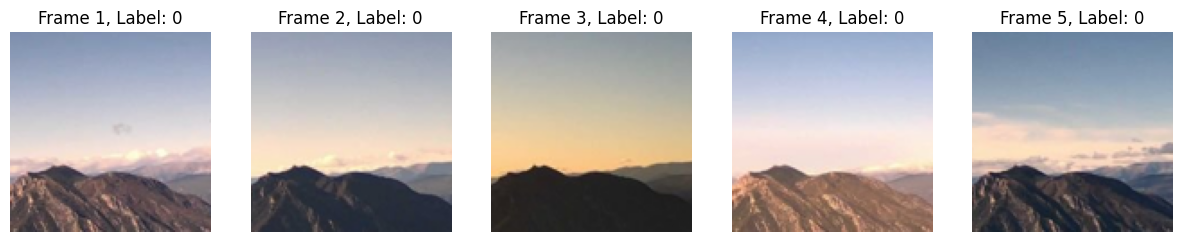

In [284]:
example_idx = 4  # Índice del ejemplo que deseas visualizar
images, labels = dataset[example_idx]

# Asegúrate de que las imágenes y etiquetas no sean None
if images is not None and labels is not None:
    print(f"Etiquetas para los 32 frames: {labels}")

    # Mostrar las primeras 5 imágenes como ejemplo
    fig, axs = plt.subplots(1, 5, figsize=(15, 3))
    for i in range(5):
        img = images[i].permute(1, 2, 0).numpy()  # Convertir de tensor a numpy
        axs[i].imshow(img)
        axs[i].set_title(f'Frame {i+1}, Label: {labels[i].item()}')
        axs[i].axis('off')
    plt.show()
else:
    print("No se encontraron imágenes o etiquetas en el ejemplo.")